## Load Data & Check Missing Values

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("seeds.csv")

# Display basic info and missing values
print("First 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

First 5 rows:
       V1     V2      V3     V4     V5     V6     V7  V8
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220   1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956   1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825   1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805   1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175   1

Missing values:
 V1    0
V2    0
V3    0
V4    0
V5    0
V6    0
V7    0
V8    0
dtype: int64


## Noise Reduction (Outlier Removal using Z-score)

In [2]:
import numpy as np
from scipy.stats import zscore

# Separate features and label
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values - 1  # Convert class labels from 1,2,3 to 0,1,2

# Remove noise using Z-score method
z_scores = np.abs(zscore(X))
filtered_entries = (z_scores < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

## Normalization

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Add bias term
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


## Gradient Descent Setup

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Add bias term
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

## Softmax Function

In [5]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

## Cross-Entropy Loss and Gradient Descent (100 Epochs)

In [6]:
def compute_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-15), axis=1))

def gradient_descent(X, y, lr=0.1, epochs=100):
    m, n = X.shape
    k = y.shape[1]
    theta = np.zeros((n, k))
    loss_history = []

    for epoch in range(epochs):
        logits = X @ theta
        y_pred = softmax(logits)
        loss = compute_loss(y, y_pred)
        gradient = X.T @ (y_pred - y) / m
        theta -= lr * gradient
        loss_history.append(loss)
        print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

    return theta, loss_history

# Train the model
theta, losses = gradient_descent(X_train_bias, y_train, lr=0.1, epochs=100)

Epoch 1, Loss: 1.0986
Epoch 2, Loss: 0.9541
Epoch 3, Loss: 0.8505
Epoch 4, Loss: 0.7745
Epoch 5, Loss: 0.7168
Epoch 6, Loss: 0.6716
Epoch 7, Loss: 0.6349
Epoch 8, Loss: 0.6045
Epoch 9, Loss: 0.5787
Epoch 10, Loss: 0.5564
Epoch 11, Loss: 0.5369
Epoch 12, Loss: 0.5196
Epoch 13, Loss: 0.5041
Epoch 14, Loss: 0.4901
Epoch 15, Loss: 0.4774
Epoch 16, Loss: 0.4658
Epoch 17, Loss: 0.4551
Epoch 18, Loss: 0.4452
Epoch 19, Loss: 0.4361
Epoch 20, Loss: 0.4275
Epoch 21, Loss: 0.4196
Epoch 22, Loss: 0.4121
Epoch 23, Loss: 0.4051
Epoch 24, Loss: 0.3985
Epoch 25, Loss: 0.3923
Epoch 26, Loss: 0.3865
Epoch 27, Loss: 0.3809
Epoch 28, Loss: 0.3756
Epoch 29, Loss: 0.3706
Epoch 30, Loss: 0.3658
Epoch 31, Loss: 0.3613
Epoch 32, Loss: 0.3570
Epoch 33, Loss: 0.3528
Epoch 34, Loss: 0.3489
Epoch 35, Loss: 0.3451
Epoch 36, Loss: 0.3414
Epoch 37, Loss: 0.3379
Epoch 38, Loss: 0.3346
Epoch 39, Loss: 0.3314
Epoch 40, Loss: 0.3282
Epoch 41, Loss: 0.3253
Epoch 42, Loss: 0.3224
Epoch 43, Loss: 0.3196
Epoch 44, Loss: 0.31

## Accuracy Calculation

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

def predict(X, theta):
    logits = X @ theta
    return np.argmax(softmax(logits), axis=1)

# Predict
y_pred = predict(X_test_bias, theta)
y_true = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.9285714285714286
Confusion Matrix:
 [[10  0  1]
 [ 2 13  0]
 [ 0  0 16]]


## Plot Loss Across Epochs

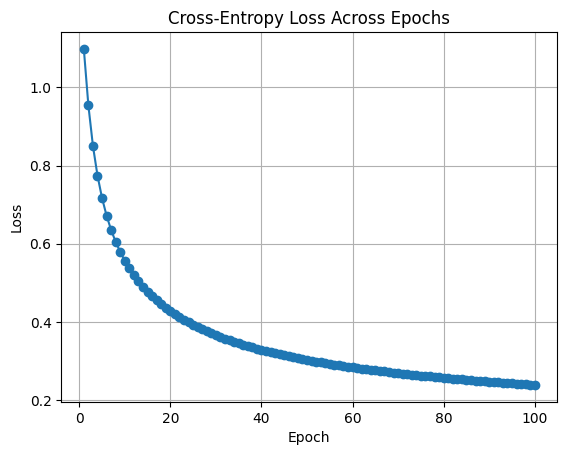

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss Across Epochs")
plt.grid(True)
plt.show()